# Coding project - Tumour segmentation

The image below is a slice of a brain MRI with a large tumour in it. The goal of this project is to create an algorithm to automatically segment the tumour.

Given that the resolution of the image is of 0.115 cm/px in both axis, estimate the area of the tumour (in cm²). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.filters.rank as skr

from matplotlib.pyplot import cm
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2hsv , hsv2rgb
from skimage.segmentation import mark_boundaries, watershed
from skimage.morphology import disk
from skimage.filters import threshold_otsu, gaussian, sobel, rank
from skimage.filters.rank import mean, median
from skimage.measure import label, regionprops


%matplotlib inline


C:\Users\Moi\AppData\Local\Temp\ipykernel_7928\3338674445.py:3: UserWarning: Possible precision loss converting image of type int32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  gradr = rank.gradient(mean(im[:,:,0],disk(1)).astype('int'),disk(1))
C:\Users\Moi\anaconda3\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int32 to uint8 without scaling because max value 254 fits in uint8
  return _convert(image, np.uint8, force_copy)
C:\Users\Moi\AppData\Local\Temp\ipykernel_7928\3338674445.py:4: UserWarning: Possible precision loss converting image of type int32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  gradg = rank.gradient(mean(im[:,:,1],disk(1)).astype('int'),disk(1))
C:\Users\Moi\AppData\Local\Temp\ipykernel_7928\3338674445.py:5: UserWarning: Possible precision loss converting image of type int32 to uint8 as required by rank fi

Text(0.5, 1.0, 'gradient')

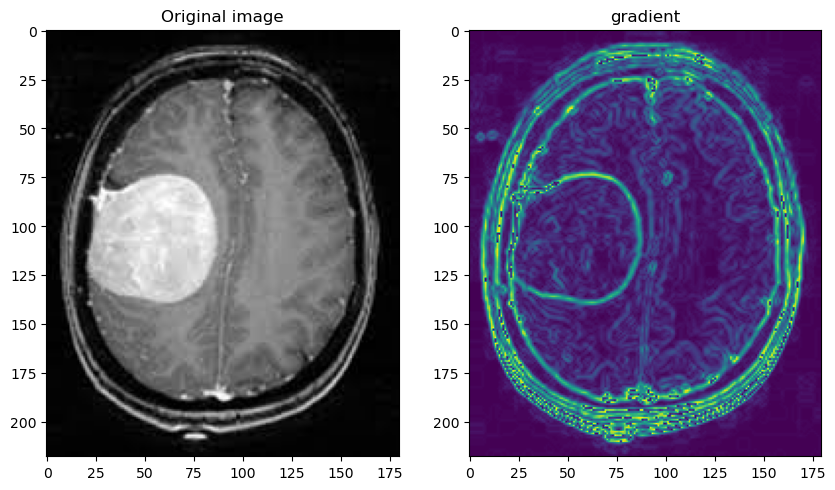

In [2]:
im = imread('mri_brain.jpg')

gradr = rank.gradient(mean(im[:,:,0],disk(1)).astype('int'),disk(1))
gradg = rank.gradient(mean(im[:,:,1],disk(1)).astype('int'),disk(1))
gradb = rank.gradient(mean(im[:,:,2],disk(1)).astype('int'),disk(1))
grad = gradr+gradg+gradb

#display the result
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(im)
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(grad)
plt.title('gradient')


The tumor area is : 46cm^2


Text(0.5, 1.0, 'Result')

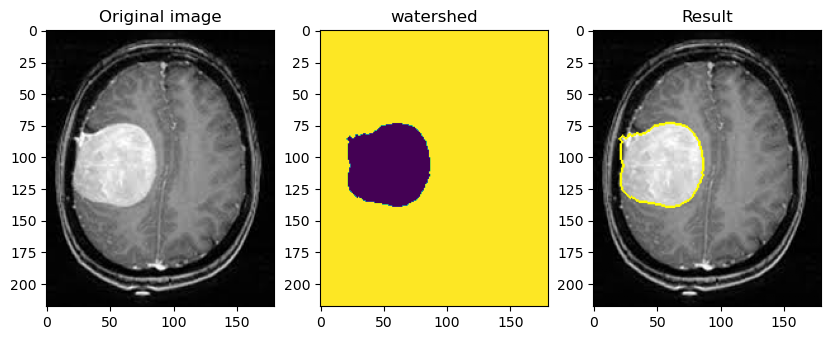

In [3]:
coords =np.array([[100 , 50],[100 , 150]])

markers = np.zeros_like(im[:,:,0])
i=1
for row, col in coords : 
    markers[row, col]= i
    i+=1

ws = watershed(grad, markers)
result = mark_boundaries(im,ws)
area =int((ws==1).sum()*0.115*0.115)
print('The tumor area is : ' + str(area) + 'cm^2')

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(im)
plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow(ws)
plt.title('watershed')
plt.subplot(1,3,3)
plt.imshow(result)
plt.title('Result')
